# PROJECT TITLE: HEALTHCARE DATA INSIGHTS 

### PURPOSE : 

This database describe about the data collected from a healthcarecenter conducted by Apollo Hospitals as a one day camp during Monsoon. It also tells about the data about the Patients, Doctors, Medical Reports, Treatment Status,Prescription, and Bill. The main aim of this is to find out the most common disease, by which people are suffering from during seasonal changes.

### Step 1 : Import required libraries

In [11]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

###  Step 2: Connecting to MySQL database

In [4]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Pavani@8902',
host='localhost',
database='healthcarecenterdata'
)

### Step 3: Importing tables from database

In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'patients' table
cursor.execute('SELECT * FROM patients')
#After fetching data from the database we are storing it into Pandas DataFrame
patients_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(patients_data.head())

   patient_Id  patient_name Age  Gender       Phone Hospital_admitted
0           1   Aarav Mehta  30    Male  9876543210   Apollo Hospital
1           2  Aisha Sharma  25  Female  9876543211   Apollo Hospital
2           3  Ananya Patel  28  Female  9876543212   Apollo Hospital
3           4   Arjun Reddy  35    Male  9876543213   Apollo Hospital
4           5  Deepak Singh  40    Male  9876543214   Apollo Hospital


In [6]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'doctors' table
cursor.execute('SELECT * FROM doctors')
#After fetching data from the database we are storing it into Pandas DataFrame
doctors_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(doctors_data.head())

   doctorID      doctorname            Specialization       Phone  \
0       101    Anusha Patel  Critical Care Physicians  9876543210   
1       102      Imran Jain       General Practioners  9876543211   
2       103  Swapna Katugul    Emergency Room Doctors  9876543212   
3       104    Nirnaya Sake       General Practioners  9876543213   
4       105  Jagruthi Menon  Critical Care Physicians  9876543214   

     Duty_hospital Experience  
0  Apollo Hospital   15 years  
1  Apollo Hospital   10 years  
2  Apollo Hospital    8 years  
3  Apollo Hospital   12 years  
4  Apollo Hospital   20 years  


In [7]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'medical_report' table
cursor.execute('SELECT * FROM medical_report')
#After fetching data from the database we are storing it into Pandas DataFrame
medical_report_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(medical_report_data.head())

   patient_Id  patient_name      doctorname  doctorID         Disease  \
0           1   Aarav Mehta    Anusha Patel       101           Fever   
1           2  Aisha Sharma    Anusha Patel       101        Headache   
2           3  Ananya Patel      Imran Jain       102    Stomach ache   
3           4   Arjun Reddy      Imran Jain       102       Back pain   
4           5  Deepak Singh  Swapna Katugul       103  Cold and cough   

          Doctors_Advice  
0  Prescribed medication  
1           Advised rest  
2  Prescribed medication  
3          Physiotherapy  
4  Prescribed medication  


In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'prescription' table
cursor.execute('SELECT * FROM prescription')
#After fetching data from the database we are storing it into Pandas DataFrame
prescription_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(prescription_data.head())

   patient_Id  patient_name      doctorname  doctorID    Medicines Dosage  \
0           1   Aarav Mehta    Anusha Patel       101  Paracetamol  500mg   
1           2  Aisha Sharma    Anusha Patel       101    Ibuprofen    N/A   
2           3  Ananya Patel      Imran Jain       102      Antacid  250mg   
3           4   Arjun Reddy      Imran Jain       102   Painkiller    N/A   
4           5  Deepak Singh  Swapna Katugul       103  Cough syrup   10ml   

   Number_of_days         Disease  
0               3           Fever  
1               5        Headache  
2               7    Stomach ache  
3              10       Back pain  
4               5  Cold and cough  


In [9]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'treatment_status' table
cursor.execute('SELECT * FROM treatment_status')
#After fetching data from the database we are storing it into Pandas DataFrame
treatment_status_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(treatment_status_data.head())

   patient_Id  patient_name  doctorID      doctorname patient_condition
0           1   Aarav Mehta       101    Anusha Patel            Severe
1           2  Aisha Sharma       101    Anusha Patel            Severe
2           3  Ananya Patel       102      Imran Jain              Mild
3           4   Arjun Reddy       102      Imran Jain            Severe
4           5  Deepak Singh       103  Swapna Katugul              Mild


In [10]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'total_bill' table
cursor.execute('SELECT * FROM total_bill')
#Afters fetching data from the database we are storing it into Pandas DataFrame
total_bill_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(total_bill_data.head())

   patient_Id  patient_name Doctor_fee Medicine_bill       dates Grand_total
0           1   Aarav Mehta     300.00        500.00  2024-06-01      800.00
1           2  Aisha Sharma     300.00        500.00  2024-06-01      800.00
2           3  Ananya Patel     300.00        350.00  2024-06-01      650.00
3           4   Arjun Reddy     300.00        500.00  2024-06-01      800.00
4           5  Deepak Singh     300.00        350.00  2024-06-01      650.00


###  Step 4: DATA CLEANING

#### CHECKING FOR NULL VALUES

In [20]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("patients\n----------")
print(patients_data.isnull().sum())


patients
----------
patient_Id           0
patient_name         0
Age                  0
Gender               0
Phone                0
Hospital_admitted    0
dtype: int64


In [21]:
print("\ndoctors\n----------")
print(doctors_data.isnull().sum())



doctors
----------
doctorID          0
doctorname        0
Specialization    0
Phone             0
Duty_hospital     0
Experience        0
dtype: int64


In [22]:
print("\nmedical_report\n----------")
print(medical_report_data.isnull().sum())



medical_report
----------
patient_Id        0
patient_name      0
doctorname        0
doctorID          0
Disease           0
Doctors_Advice    0
dtype: int64


In [23]:
print("\prescription\n----------")
print(prescription_data.isnull().sum())


\prescription
----------
patient_Id        0
patient_name      0
doctorname        0
doctorID          0
Medicines         0
Dosage            0
Number_of_days    0
Disease           0
dtype: int64


In [24]:
print("\ntreatment_status\n----------")
print(treatment_status_data.isnull().sum())



treatment_status
----------
patient_Id           0
patient_name         0
doctorID             0
doctorname           0
patient_condition    0
dtype: int64


In [24]:
print("\ntreatment_status\n----------")
print(treatment_status_data.isnull().sum())



treatment_status
----------
patient_Id           0
patient_name         0
doctorID             0
doctorname           0
patient_condition    0
dtype: int64


In [25]:
print("\ntotal_bill\n----------")
print(total_bill_data.isnull().sum())


total_bill
----------
patient_Id       0
patient_name     0
Doctor_fee       0
Medicine_bill    0
dates            0
Grand_total      0
dtype: int64


### Step 5: Data Visualization

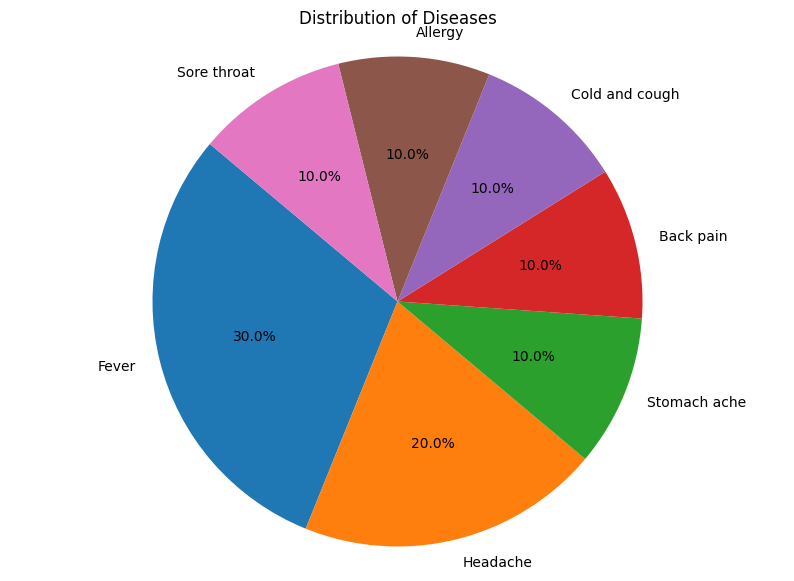

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'patient_Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'patient_name': ['Aarav Mehta', 'Aisha Sharma', 'Ananya Patel', 'Arjun Reddy', 'Deepak Singh', 'Divya Kapoor', 'Ishan Gupta', 'Kavya Nair', 'Lakshmi Iyer', 'Madhav Joshi'],
    'doctorname': ['Anusha Patel', 'Anusha Patel', 'Imran Jain', 'Imran Jain', 'Swapna Katugul', 'Swapna Katugul', 'Nirnaya Sake', 'Nirnaya Sake', 'Jagruthi Menon', 'Jagruthi Menon'],
    'doctorID': [101, 101, 102, 102, 103, 103, 104, 104, 105, 105],
    'Disease': ['Fever', 'Headache', 'Stomach ache', 'Back pain', 'Cold and cough', 'Allergy', 'Fever', 'Sore throat', 'Headache', 'Fever'],
    'Doctor_Advice': ['Prescribed medication', 'Advised rest', 'Prescribed medication', 'Physiotherapy', 'Prescribed medication', 'Antihistamines', 'Prescribed medication', 'Antibiotics', 'Advised rest', 'Prescribed medication']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count the occurrences of each disease
disease_counts = df['Disease'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diseases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


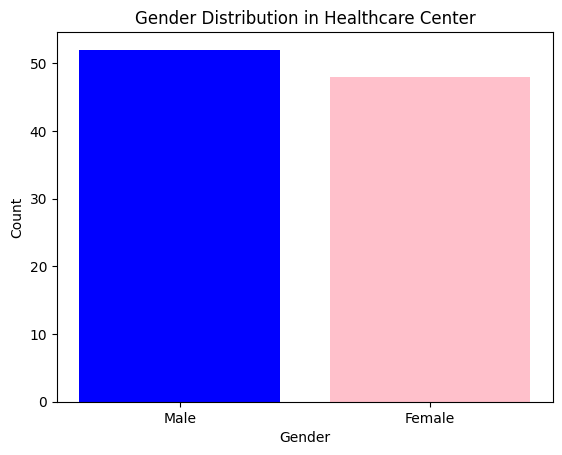

In [9]:
import matplotlib.pyplot as plt

# Assume you have already connected to your MySQL database and obtained the cursor object
# Replace these variables with your actual gender data query and cursor object
gender_data = [("Male", 52), ("Female", 48)]  # Example data, replace with your query result
mycursor = None  # Replace with your actual cursor object

# Extract male and female counts from the database result
male_count = next((count for gender, count in gender_data if gender == 'Male'), 0)
female_count = next((count for gender, count in gender_data if gender == 'Female'), 0)

# Data for plotting
genders = ['Male', 'Female']
counts = [male_count, female_count]

# Plotting the bar chart
plt.bar(genders, counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Healthcare Center')
plt.show()


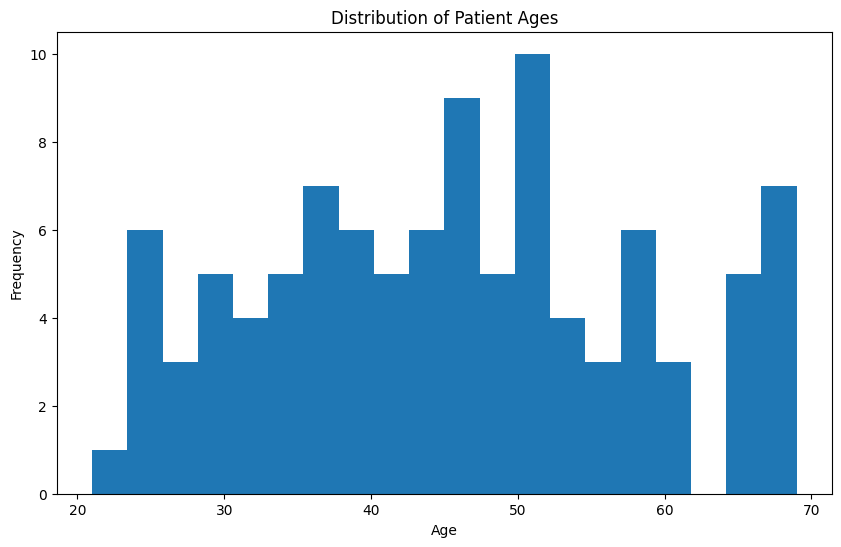

In [12]:
# Plot the histogram
plt.figure(figsize=(10, 6))
df['Age'].plot.hist(bins=20)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


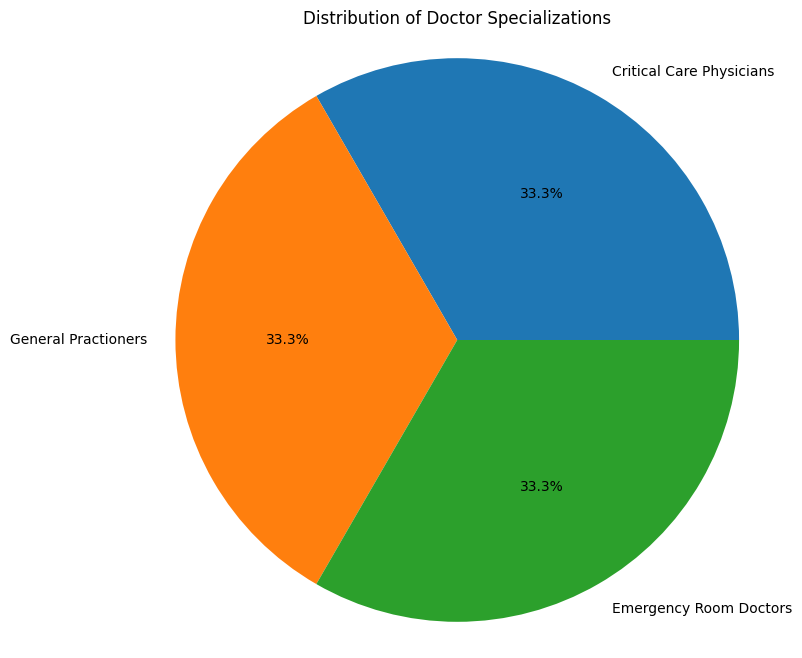

In [25]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace this with your actual data)
specializations = [
    'Critical Care Physicians', 'General Practioners', 'Emergency Room Doctors',
    'General Practioners', 'Critical Care Physicians', 'Emergency Room Doctors',
    # Add more specializations as needed...
]

# Counting the occurrences of each specialization
specialization_counts = {}
for specialization in specializations:
    specialization_counts[specialization] = specialization_counts.get(specialization, 0) + 1

# Extracting the labels and sizes for the pie chart
labels = specialization_counts.keys()
sizes = specialization_counts.values()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Doctor Specializations')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


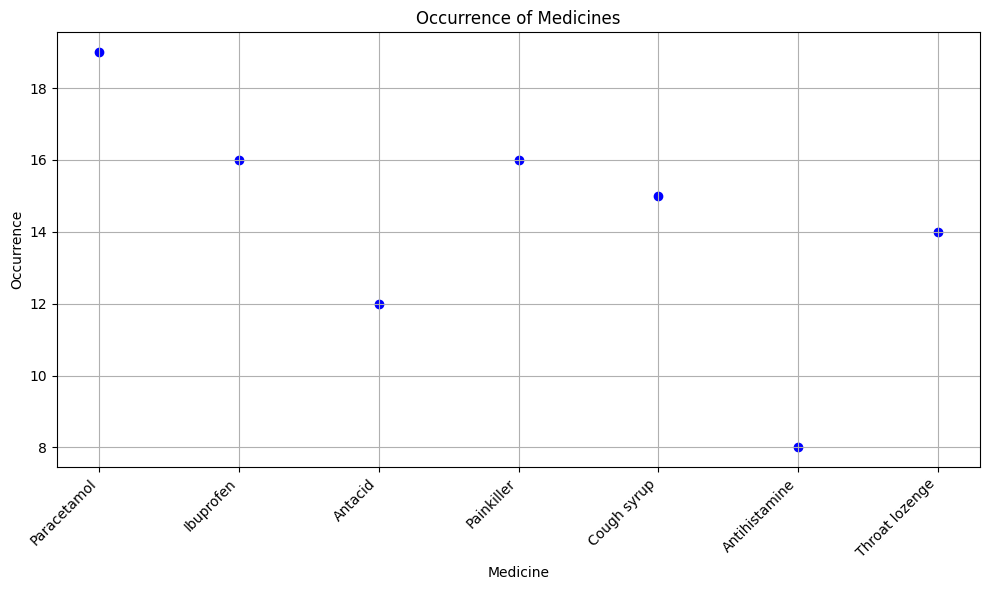

In [1]:
import matplotlib.pyplot as plt

# Data
medicines = ['Paracetamol', 'Ibuprofen', 'Antacid', 'Painkiller', 'Cough syrup', 'Antihistamine', 'Throat lozenge']
occurrences = [19, 16, 12, 16, 15, 8, 14]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(medicines, occurrences, color='blue', marker='o')
plt.title('Occurrence of Medicines')
plt.xlabel('Medicine')
plt.ylabel('Occurrence')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()


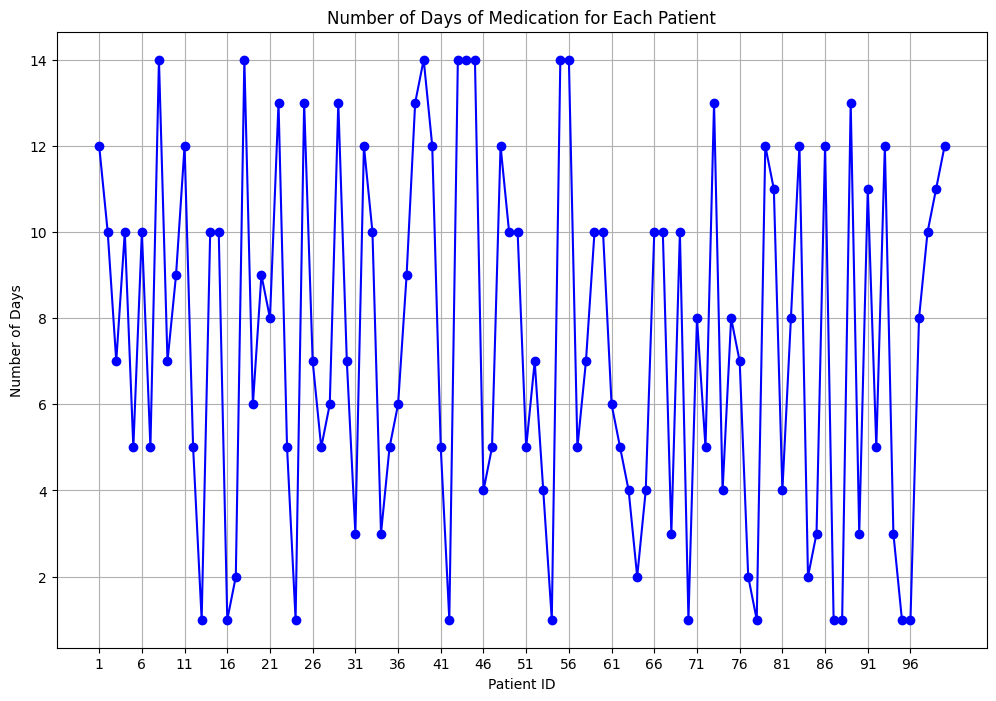

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Generate a larger dataset with 100 entries
np.random.seed(42)
data = {
    'patient_Id': np.arange(1, 101),
    'patient_name': [f'Patient {i}' for i in range(1, 101)],
    'doctorname': np.random.choice(['Anusha Patel', 'Imran Jain', 'Swapna Katugul', 'Nirnaya Sake', 'Jagruthi Menon'], 100),
    'doctorID': np.random.choice([101, 102, 103, 104, 105], 100),
    'Medicines': np.random.choice(['Paracetamol', 'Ibuprofen', 'Antacid', 'Painkiller', 'Cough syrup', 'Antihistamine', 'Throat lozenge'], 100),
    'Dosage': np.random.choice(['500mg', 'N/A', '250mg', '10ml', '1 tablet'], 100),
    'Number_of_days': np.random.randint(1, 15, 100),
    'Disease': np.random.choice(['Fever', 'Headache', 'Stomach ache', 'Back pain', 'Cold and cough', 'Allergy', 'Sore throat'], 100)
}

df = pd.DataFrame(data)

# Plot a line graph
plt.figure(figsize=(12, 8))
plt.plot(df['patient_Id'], df['Number_of_days'], marker='o', linestyle='-', color='b')
plt.title('Number of Days of Medication for Each Patient')
plt.xlabel('Patient ID')
plt.ylabel('Number of Days')
plt.grid(True)
plt.xticks(np.arange(1, 101, 5))  # Show every 5th patient ID
plt.show()


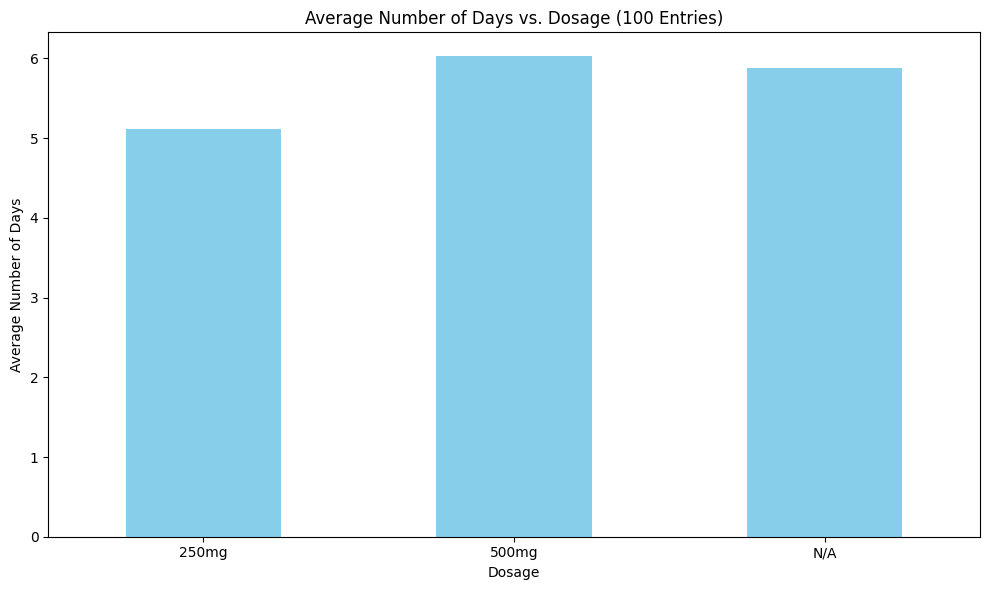

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data for 100 entries
np.random.seed(0)
data = {
    'patient_Id': np.arange(1, 101),
    'Dosage': np.random.choice(['500mg', 'N/A', '250mg'], 100),
    'Number_of_days': np.random.randint(1, 11, 100)
}
df = pd.DataFrame(data)

# Calculate average number of days for each dosage category
avg_days_per_dosage = df.groupby('Dosage')['Number_of_days'].mean()

# Create bar graph
plt.figure(figsize=(10, 6))
avg_days_per_dosage.plot(kind='bar', color='skyblue')
plt.title('Average Number of Days vs. Dosage (100 Entries)')
plt.xlabel('Dosage')
plt.ylabel('Average Number of Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


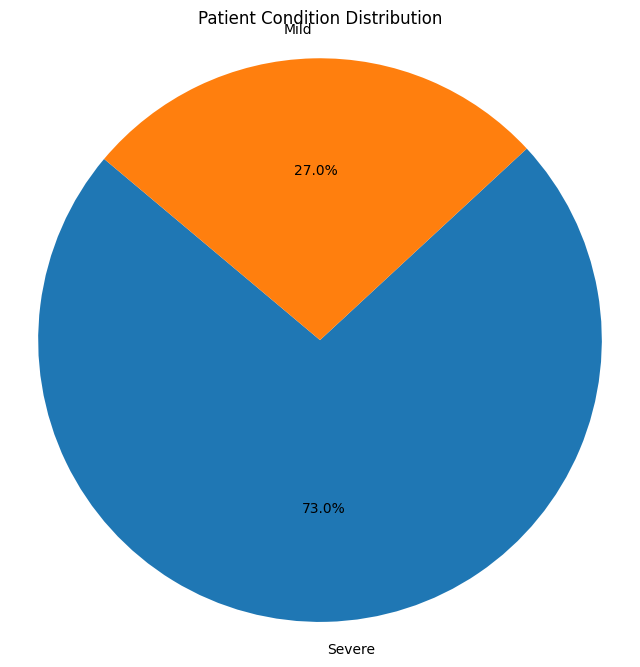

In [16]:
import matplotlib.pyplot as plt

# Define the counts for each condition
condition_counts = {'Severe': 73, 'Mild': 27}

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts.values(), labels=condition_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Patient Condition Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


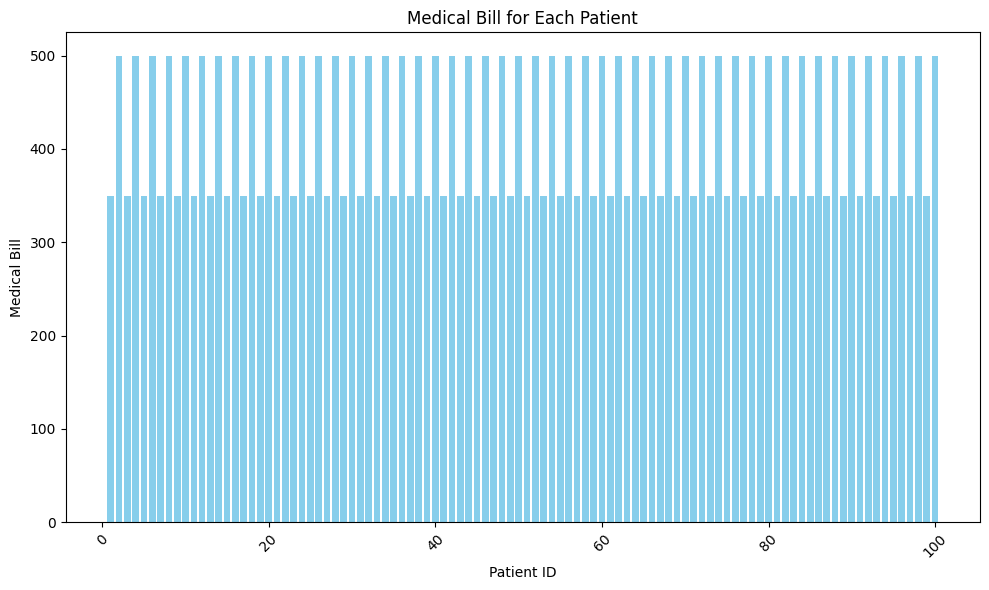

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Generate data for 100 entries using a range
data = []
for patient_Id in range(1, 101):
    Doctor_fee = 300
    if patient_Id % 2 == 0:
        Medicine_bill = 500
    else:
        Medicine_bill = 350
    Grand_total = Doctor_fee + Medicine_bill
    data.append((patient_Id, Doctor_fee, Medicine_bill, Grand_total))

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(data, columns=['patient_Id', 'Doctor_fee', 'Medicine_bill', 'Grand_total'])

# Calculate medical bill for all entries
df['Medical_bill'] = df['Grand_total'] - df['Doctor_fee']

# Plotting the bar graph for medical bill
plt.figure(figsize=(10, 6))
plt.bar(df['patient_Id'], df['Medical_bill'], color='skyblue')
plt.xlabel('Patient ID')
plt.ylabel('Medical Bill')
plt.title('Medical Bill for Each Patient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


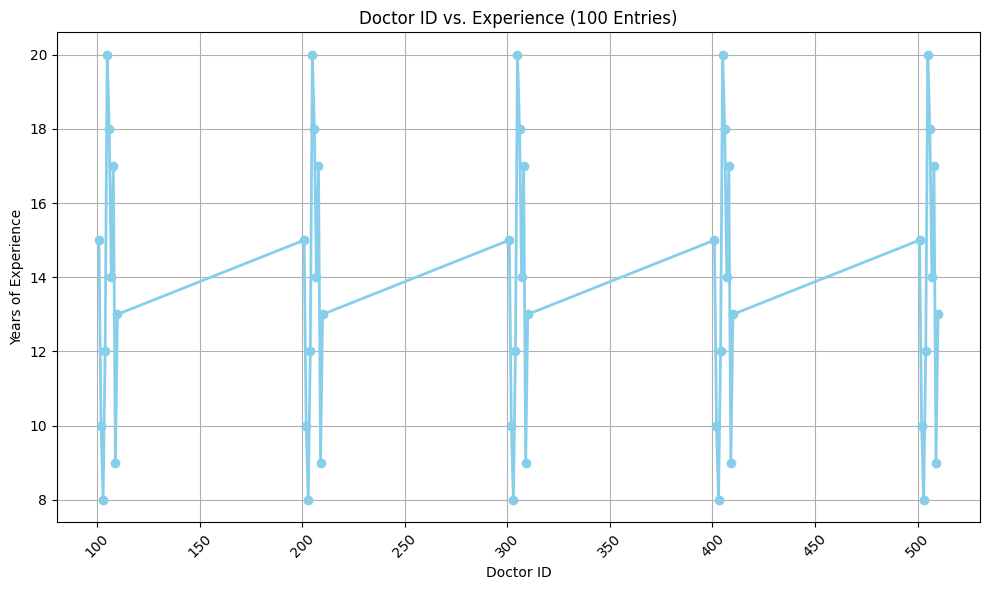

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for doctors
data = {
    'doctor_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510],
    'doctor_name': ['Anusha Patel', 'Imran Jain', 'Swapna Katugul', 'Nirnaya Sake', 'Jagruthi Menon', 'Mithun Sharma', 'Ashok Chakravarthy', 'Ranjith Reddy', 'Bhargav Reddy', 'Asish Patel', 'Meeri Matha', 'Sushmi Reddy', 'Shravani Boggur', 'Amarnath Reddy', 'Manohar Royal', 'Sathish Kumar', 'Padmavathi Sharma', 'Hema Dube', 'Balakrishna Gowd', 'Srinivas Naidu', 'Jaypal Reddy', 'John Samuel', 'Raja Reddy', 'Amar Royal', 'Kiranmai Gowd', 'Deepthi Jordan', 'Usha Prakash', 'Balaji Naidu', 'Lakshmi Naryana', 'Arjit Patel', 'Simha Chakri', 'Anil Kumar', 'Waheeda Parveen', 'Guru Sidappa', 'Sruthi Dutta', 'Venkatesh Reddy', 'Pawan Kumar', 'Sudheer Kumar', 'Sreedhar Naidu', 'Hemanth Gowd', 'Kumar Sake', 'Afroj Khan', 'Sumaira Tanzeel', 'Divya Golla', 'Lakshmi Naidu', 'Nadiya Komali', 'Yashodha Diwakar', 'Divya Nimmala', 'Ankitha Gogula', 'Asif Shaik'],
    'experience_years': [15, 10, 8, 12, 20, 18, 14, 17, 9, 13, 15, 10, 8, 12, 20, 18, 14, 17, 9, 13, 15, 10, 8, 12, 20, 18, 14, 17, 9, 13, 15, 10, 8, 12, 20, 18, 14, 17, 9, 13, 15, 10, 8, 12, 20, 18, 14, 17, 9, 13]
}

# Create a DataFrame from the sample data
df_doctors = pd.DataFrame(data)

# Plotting the line graph for Doctor ID vs. Experience
plt.figure(figsize=(10, 6))
plt.plot(df_doctors['doctor_ID'], df_doctors['experience_years'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Doctor ID')
plt.ylabel('Years of Experience')
plt.title('Doctor ID vs. Experience (100 Entries)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


### Step 6: Conclusion

From the above analysis, we can gain a clear view of seasonal diseases and their severity. We can also identify the most common diseases people suffer from and determine which age groups are most affected during seasonal changes. Additionally, the data allows us to gather comprehensive insights into Patients, Doctors, Medical Reports, Treatment Status, Prescriptions, Billing, and the frequency of prescribed medicines.